In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

#%matplotlib inline

In [2]:
events = pd.read_csv('data/calcularis_small_events.csv', encoding='latin', low_memory=False)
subtasks = pd.read_csv('data/calcularis_small_subtasks.csv', encoding='latin', low_memory=False)
users = pd.read_csv('data/calcularis_small_users.csv', encoding='latin', low_memory=False)

In [3]:
events.head(15)

,event_id,user_id,mode,game_name,learning_time_ms,number_range,start,end,skill_id,type
0,0,1,NORMAL,Subitizing,8835.0,R10,2022-11-02T08:39:12.355Z,2022-11-02T08:39:25.130Z,1.0,task
1,1,1,NORMAL,Conversion,21167.0,R10,2022-11-11T10:26:27.893Z,2022-11-11T10:26:49.260Z,4.0,task
2,2,1,NORMAL,Conversion,11182.0,R10,2022-11-18T10:34:01.044Z,2022-11-18T10:34:12.423Z,7.0,task
3,3,1,NORMAL,Landing,6823.0,R10,2022-11-25T10:32:43.428Z,2022-11-25T10:32:56.986Z,19.0,task
4,4,1,END_OF_NR,Conversion,9107.0,R10,2022-12-02T10:44:40.555Z,2022-12-02T10:44:49.874Z,7.0,task
5,5,1,END_OF_NR,Conversion,10703.0,R10,2022-12-09T10:12:16.068Z,2022-12-09T10:12:26.984Z,4.0,task
6,6,1,NORMAL,Comparison,1383.0,R20,2022-12-16T10:25:42.441Z,2022-12-16T10:25:45.508Z,33.0,task
7,7,1,END_OF_NR,Landing,6052.0,R20,2023-01-20T10:13:41.496Z,2023-01-20T10:13:49.096Z,50.0,task
8,8,1,END_OF_NR,Landing,6055.0,R20,2023-01-27T10:18:17.427Z,2023-01-27T10:18:26.356Z,49.0,task
9,9,1,END_OF_NR,Estimation on Number Line,10541.0,R20,2023-02-03T10:20:25.581Z,2023-02-03T10:20:38.687Z,39.0,task


In [4]:
subtasks.head(15)

,subtask_id,event_id,user_id,aim,answer,answerMode,availableNumbers,correct,correctAnswerObject,correctNumber,...,startPosition,subtask_finished_timestamp,target,timeoutInSeconds,timeoutInSteps,type,upperBound,divisor,orderIndependent,step
0,0,0,1,NaN,4,NaN,NaN,True,4,4.0,...,NaN,2022-11-02T08:39:24.930Z,NaN,NaN,NaN,ConciseSubitizingTaskDescription,NaN,NaN,NaN,NaN
1,1,0,1,NaN,1,NaN,NaN,True,NaN,NaN,...,NaN,2022-11-02T08:39:24.930Z,NaN,0.0,2.0,ConciseTimeoutDescription,NaN,NaN,NaN,NaN
2,2,1,1,NaN,3,NaN,NaN,True,3,NaN,...,NaN,2022-11-11T10:26:49.007Z,NaN,NaN,NaN,ConciseConversionTaskDescription,NaN,NaN,NaN,NaN
3,3,2,1,NaN,5,NaN,NaN,True,5,NaN,...,NaN,2022-11-18T10:34:12.191Z,NaN,NaN,NaN,ConciseConversionTaskDescription,NaN,NaN,NaN,NaN
4,4,3,1,3.0,"{'a': 2, 'b': 2.0402703}",NaN,NaN,False,"{'a': 3, 'b': 3.0}",NaN,...,0.5,2022-11-25T10:32:56.805Z,NaN,NaN,NaN,ConciseLandingTaskDescription,3.5,NaN,NaN,NaN
5,5,4,1,NaN,9,NaN,NaN,True,9,NaN,...,NaN,2022-12-02T10:44:49.621Z,NaN,NaN,NaN,ConciseConversionTaskDescription,NaN,NaN,NaN,NaN
6,6,5,1,NaN,7,NaN,NaN,False,9,NaN,...,NaN,2022-12-09T10:12:26.729Z,NaN,NaN,NaN,ConciseConversionTaskDescription,NaN,NaN,NaN,NaN
7,7,6,1,NaN,16,NaN,NaN,True,16,NaN,...,NaN,2022-12-16T10:25:45.293Z,NaN,NaN,NaN,ConciseSetComparisonTaskDescription,NaN,NaN,NaN,NaN
8,8,6,1,NaN,1.3659,NaN,NaN,True,NaN,NaN,...,NaN,2022-12-16T10:25:45.293Z,NaN,4.0,0.0,ConciseTimeoutDescription,NaN,NaN,NaN,NaN
9,9,7,1,4.0,"{'a': 4, 'b': 4.148817}",NaN,NaN,True,"{'a': 4, 'b': 4.0}",NaN,...,0.5,2023-01-20T10:13:48.879Z,NaN,NaN,NaN,ConciseLandingTaskDescription,5.0,NaN,NaN,NaN


In [5]:
users.head(15)

,user_id,learning_time_ms,start,end,logged_in_time_ms,language,country
0,1,14032710,2022-11-02T08:37:56.549Z,2023-02-09T11:08:02.599Z,22151340,de,CH
1,2,16268350,2022-09-07T07:53:38.865Z,2023-02-09T08:39:14.692Z,85421273,nl,NL
2,3,8012030,2021-09-27T07:45:51.806Z,2022-01-13T12:14:09.565Z,16651482,de,DE
3,4,1414421,2019-11-12T12:18:15.724Z,2020-10-02T09:20:28.798Z,4561768,de,CH
4,5,17502108,2022-04-26T11:38:44.114Z,2022-08-29T15:52:11.087Z,25601470,de,CH
5,6,8353125,2022-09-02T07:27:20.675Z,2023-02-01T10:35:15.218Z,19249399,nl,NL
6,7,7226229,2015-03-19T18:47:32.621Z,2015-05-29T18:17:32.889Z,9225357,NaN,NaN
7,8,64629753,2021-08-23T09:04:32.478Z,2022-06-20T12:13:06.081Z,125236245,de,CH
8,9,7647781,2019-08-20T17:02:06.155Z,2020-03-08T14:08:06.321Z,9089877,de,DE
9,10,22569161,2017-08-30T06:27:19.365Z,2021-07-08T14:09:17.450Z,33642991,de,NaN


In [15]:
# extract game_name and number_range from the events dataframe to match the subtasks dataframe (given the event_id)
game_name = subtasks.merge(events[['event_id', 'game_name']], on='event_id', how='left').game_name
number_range = subtasks.merge(events[['event_id', 'number_range']], on='event_id', how='left').number_range

#split the game_name into skills
skill = game_name.apply(lambda x: 'Number representation' 
                        if x in ['Subitizing', 'Conversion', 'Estimation', 'Estimation on Number Line', 'Scale: Conversion', 'Landing'] 
                        else 'Number comparison/manipulation' if x in ['Comparison', 'Secret Number', 'Distance', 'Scale: Composition', 'Order'] 
                        else 'Addition/Substraction' if x in ['Scale: Decomposition', 'Scale: Subtraction', 'Scale: Subtraction by Tens and Ones', 'Sliderule', 'Plus-minus', 'Difference', 'Completion', 'Calculator'] 
                        else 'Multiplication/Division' if x in ['Write as multiplication', 'Shelf: Jump Ahead', 'Shelf: given height', 'Shelf: random height', 'Distribution', 'Calculator: Multiplication', 'Calculator: Multiplication with ?', 'Calculator: Division', 'Jump backwards', 'Series'] 
                        else 'Other')

# concatenate skills and number range and add it to the subtasks dataframe
subtasks['skill_name'] = skill + ' ' + number_range

# BKT Model

In [7]:
from pyBKT.models import Model

In [8]:
model = Model(seed=0, defaults={'order_id' : 'subtask_id'})
model.fit(data=subtasks, 
          multilearn = 'user_id',
          multigs = 'user_id',
          forgets = True)

<Axes: xlabel='skill + param'>

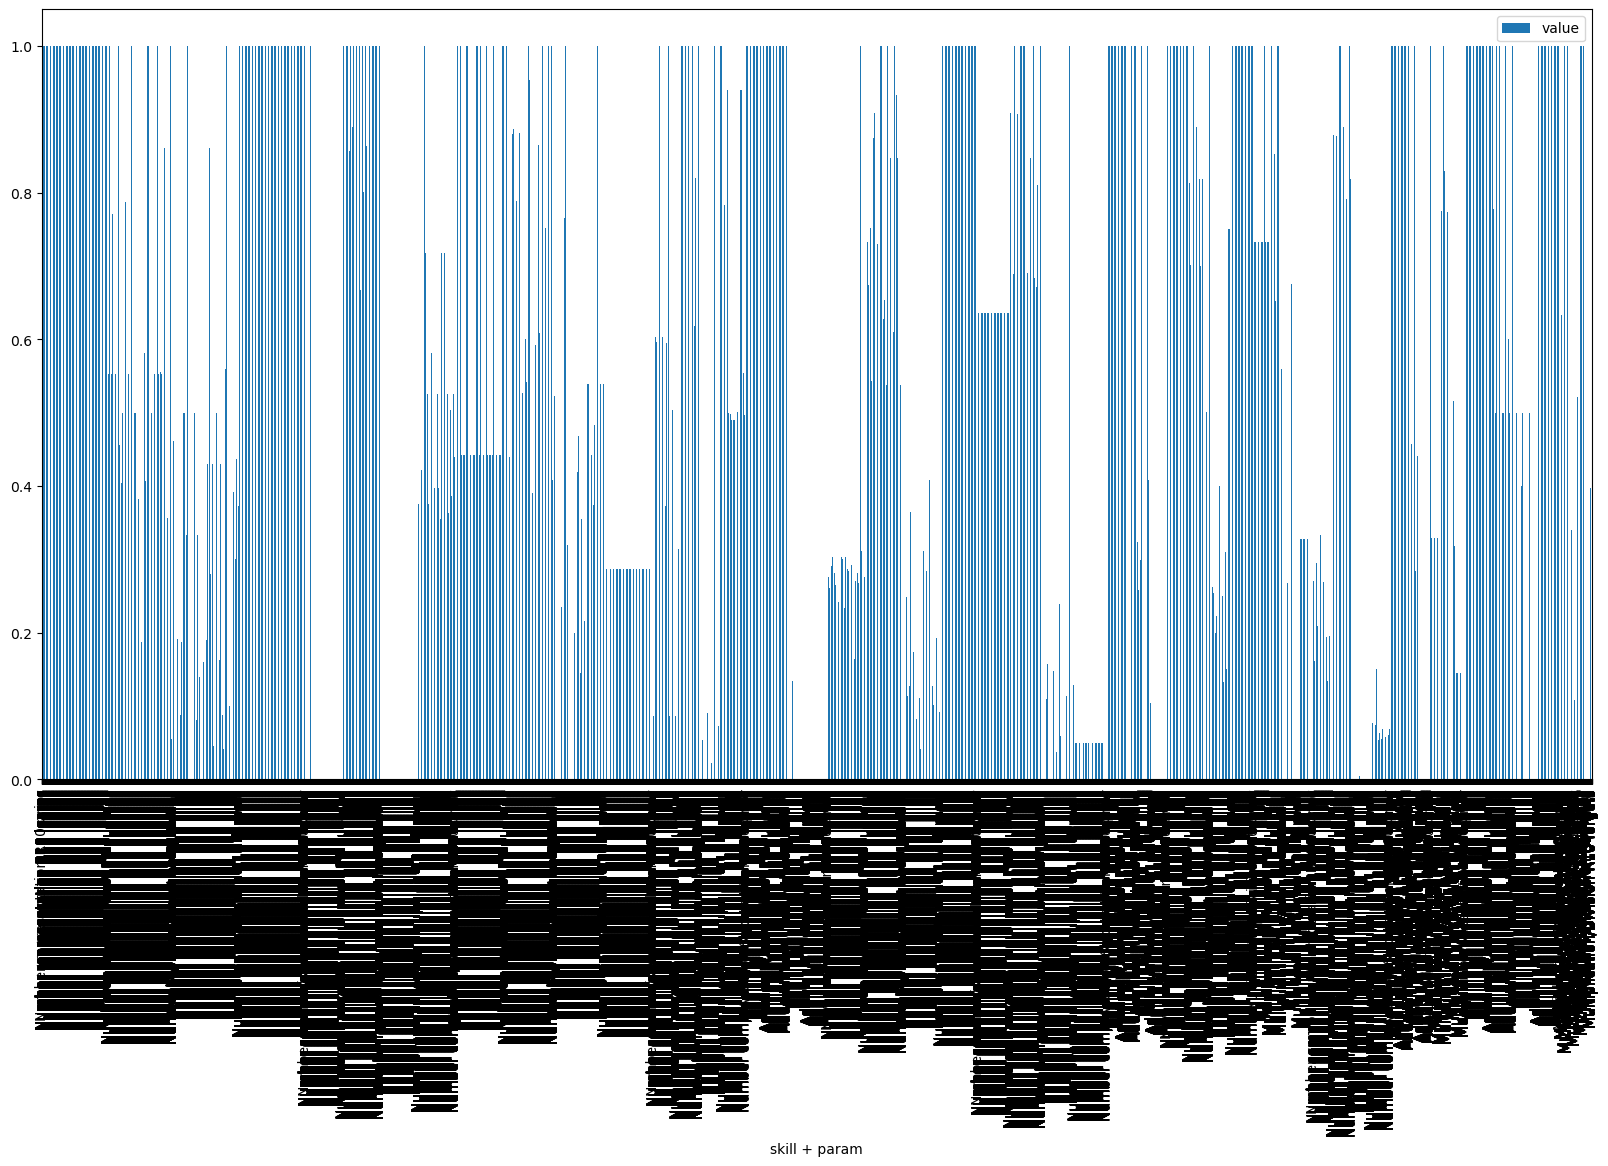

In [50]:
params = model.params()
#params.reset_index(inplace=False)
#params['skill + param'] = params.index.get_level_values(0) + ' ' + params.index.get_level_values(1)
#params.reset_index(inplace=True, drop=True)
#params
params.reset_index(inplace=True)
params['skill + param'] = params.skill + ' ' + params.param
params.drop(['skill', 'param', 'class'], axis=1, inplace=True)
params.plot(x='skill + param', y='value', kind='bar', figsize=(20,10))

#params.index.get_level_values(0).to_series() + ' ' + params.index.get_level_values(1).to_series()

In [34]:
params.plot(data=params, x=['skill', 'param'], y='value', kind='bar', figsize=(20, 10))

ValueError: x must be a label or position

In [20]:
#params.groupby(['skill', 'param']).
#.transpose().columns

AttributeError: Can only use .str accessor with Index, not MultiIndex

In [10]:
subtasks = model.predict(data=subtasks)

In [11]:
a = subtasks.groupby(['user_id', 'skill_name']).last()
display(a[['correct', 'correct_predictions', 'state_predictions']])
#b[['user_id', 'skill_name', 'correct', 'correct_predictions', 'state_predictions']].head(40)
#model.predict(data=subtasks)

correct  correct_predictions   
user_id skill_name                                                         
1       Number comparison/manipulation R20        0              0.50289  \
        Number representation R10                 0              0.55108   
        Number representation R20                 1              1.00000   
2       Addition/Substraction R10                 1              1.00000   
        Number comparison/manipulation R10        0              0.75875   
...                                             ...                  ...   
998     Number comparison/manipulation R20        1              1.00000   
        Number representation R10                 0              0.55108   
        Number representation R100                1              0.50332   
        Number representation R20                 1              0.83255   
1000    Number representation R10                 1              0.90324   

                                            state_predictions  
user_id skill_name                                             
1       Number comparison/manipulation R20            0.12047  
        Number representation R10                     0.02683  
        Number representation R20                     0.60945  
2       Addition/Substraction R10                     0.92591  
        Number comparison/manipulation R10            0.43214  
...                                                       ...  
998     Number comparison/manipulation R20            0.02215  
        Number representation R10                     0.02683  
        Number representation R100                    0.19465  
        Number representation R20                     0.60668  
1000    Number representation R10                     0.95462  

[5302 rows x 3 columns]

In [ ]:
# generate a machine learning model using an exponential family of distributions (in particular, the exponential distribution) to predict the state_predictions

